# Example 3 - Aar model

In this example, we show how ArchPy can manage real field data and generate easily geological models based on borehole data and a prior geological concept.
The emphasis here is not on creating the stratigraphic pile, but more on the possibilities of archpy (dealing with raster, shapefiles, etc.)

In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gp
import geone
import geone.covModel as gcm
import geone.geosclassicinterface as gci
import geone.imgplot3d as imgplt3
import pyvista as pv
pv.set_jupyter_backend('server')
import os
import sys
import shapely
import rasterio
from shapely.geometry import Polygon, MultiPolygon


import ArchPy
from ArchPy.base import *

### import Table

As the arch table has already been constructed, we can simply load it with the following function ``ArchPy.inputs.import_project``.

We do not import the grid, nor the boreholes because we will modify the grid.

In [2]:
ws = "Workspace"  # define the workspace path
T1 = ArchPy.inputs.import_project("Aar_geomodel", ws=ws, import_bhs=False, import_grid=False, import_results=False)

### IMPORTING PROJECT Aar_geomodel IN Workspace DIRECTORY ### 

Unit Alte Seetone: Surface added for interpolation
Facies Clay and silt added to unit Alte Seetone
Facies Clayey sand added to unit Alte Seetone
Facies Sand added to unit Alte Seetone
Facies others added to unit Alte Seetone
Unit Bumberg: Surface added for interpolation
Facies Gravel added to unit Bumberg
Facies Clayey gravel added to unit Bumberg
Facies Sand added to unit Bumberg
Facies Clayey sand added to unit Bumberg
Unit Hangschutt_Bachschutt: Surface added for interpolation
Facies Clay and silt added to unit Hangschutt_Bachschutt
Facies Gravel added to unit Hangschutt_Bachschutt
Facies Clayey gravel added to unit Hangschutt_Bachschutt
Unit LGA: Surface added for interpolation
Facies Gravel added to unit LGA
Facies Sand added to unit LGA
Facies Clayey gravel added to unit LGA
Unit LGL: Surface added for interpolation
Facies Sand added to unit LGL
Facies Clay and silt added to unit LGL
Unit LGM: Surface added for inter

Let's look at this pile and its parameters

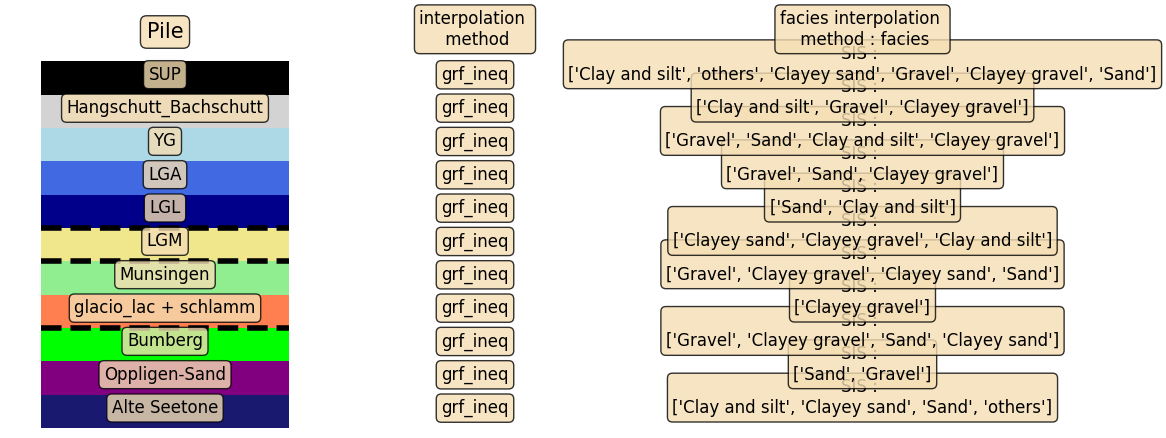

In [3]:
#plotting the actual pile
plt.figure(figsize=(10,5),dpi=100)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

i=0
for s in T1.get_pile_master().list_units[::-1]:

    if s.contact=="onlap":
        i+= 1
        plt.bar(0,1,color=s.c,bottom=i)
        plt.text(0,i+0.45,s.name,fontsize=12, bbox=props,ha="center")
        plt.text(1,i+.45,s.surface.int_method,fontsize=12, bbox=props,ha="center")
        plt.text(2.25,i+.45,"{} : \n{}".format(s.f_method,[f.name for f in s.list_facies]),fontsize=12, bbox=props,ha="center")
    if s.surface.contact == "erode":
        plt.plot((-0.4,0.4),(i+1,i+1),"k--",linewidth=4)
plt.xlim(-.5,2)

plt.text(0,i+1.7,"Pile",fontsize=15,bbox=props,ha="center")
plt.text(1,i+1.5,"interpolation \n method",fontsize=12,bbox=props,ha="center")

plt.text(2.25,i+1.5,"facies interpolation \n method : facies",fontsize=12,bbox=props,ha="center")

plt.axis('off')
plt.show()


### Grid

In [4]:
# boundaries of the domain
xmin, ymin, xmax, ymax = [2608681.53416453, 1182957.23386415,
                          2611720.70682989, 1189026.05200782]

# grid
oz = 470
z1 = 590
sy = 50
sx = 50
sz = 2
xg = np.arange(xmin, xmax+sx, sx)
nx = len(xg)-1
yg = np.arange(ymin, ymax+sy, sy)
ny = len(yg)-1
zg = np.arange(oz, z1+sz, sz)
nz = len(zg)-1

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (xmin, ymin, oz)

Archpy can directly take the shapefiles and raster. For this, simply pass the path of the corresponding files to the function ``add_grid()`` and let ArchPy do the work.

Here we provide the dem for the (``top``) of the model and the bedrock raster for the bottom (``bot``).

In [5]:
# paths

# grid
dem_path = "data/MNT25.tif"
bedrock_path="data/BEM25-2021_crop_2.tif"
    
#polygon
polygon_path = "data/polygon.shp"  # shapefile

# add grid
T1.add_grid(dimensions, spacing, origin, polygon=polygon_path, top = dem_path, bot = bedrock_path)

## Adding Grid ##
Top is a raster - resampling activated
Bot is a raster - resampling activated
Polygon is a shapely instance - discretization activated
## Grid added and is now simulation grid ##


### Boreholes

Let's import boreholes as usual, files are in the data folder.

In [6]:
import pandas as pd

list_bhs = pd.read_csv("data/Aar_geomodel.lbh")
unit_data = pd.read_csv("data/Aar_geomodel.ud")
facies_data = pd.read_csv("data/Aar_geomodel.fd")

db, lbhs = ArchPy.inputs.load_bh_files(list_bhs, facies_data, unit_data)
boreholes = ArchPy.inputs.extract_bhs(db, lbhs, T1, vb=0)
T1.add_bh(boreholes)

Borehole A1140 added
Borehole A1257 added
Borehole A1258 added
Borehole A1259 added
Borehole A1319 added
Borehole A1321 added
Borehole A133 added
Borehole A264 added
Borehole A528 added
Borehole A529 added
Borehole A530 added
Borehole A531 added
Borehole A532 added
Borehole A533 added
Borehole A7068 added
Borehole A7069 added
Borehole A7111 added
Borehole A7141 added
Borehole A7296 added
Borehole A76 added
Borehole A77 added
Borehole A78 added
Borehole A79 added
Borehole A80 added
Borehole A81 added
Borehole AKB_2001 added
Borehole AKB_2002 added
Borehole AKB_2005 added
Borehole AKB_2006 added
Borehole AKB_2009 added
Borehole AKB_2012 added
Borehole AKB_2013 added
Borehole AKB_2014 added
Borehole AKB_2016 added
Borehole AKB_2017 added
Borehole AKB_2018 added
Borehole AKB_2022 added
Borehole AKB_2023 added
Borehole AKB_2026 added
Borehole AKB_2027 added
Borehole AKB_2028 added
Borehole AKB_2031 added
Borehole AKB_2038 added
Borehole AKB_2040 goes below model limits, borehole AKB_2040 de

ArchPy integrates some function to analyse the boreholes (``ArchPy.inputs.bhs_analysis``). This function takes the geological database obtained previously as input.

### Units proportion in boreholes
Strat_ID
Alte Seetone             119.95
Bumberg                  401.40
Hangschutt_Bachschutt     50.00
LGA                       46.70
LGL                       31.60
LGM                        4.30
Munsingen                201.85
Oppligen-Sand             37.40
SUP                       41.10
YG                       158.60
glacio_lac + schlamm       4.85
Name: thickness, dtype: float64


thickness
Strat_ID              Facies_ID               
Alte Seetone          Clay and silt   0.406419
                      Clayey sand     0.349312
                      Gravel          0.004168
                      Sand            0.240100
Bumberg               Clay and silt   0.003986
                      Clayey gravel   0.179372
                      Clayey sand     0.122945
                      Gravel          0.550324
                      Sand            0.143000
                      others          0.000374
Hangschutt_Bachschutt Clay and silt   0.472000
                      Clayey gravel   0.168000
                      Gravel          0.334000
                      Sand            0.026000
LGA                   Clay and silt   0.014989
                      Clayey gravel   0.062099
                      Gravel          0.650964
                      Sand            0.271949
LGL                   Clay and silt   0.322785
                      Sand            0.677215
LGM                   Clay and silt   0.325581
                      Clayey gravel   0.674419
Munsingen             Clay and silt   0.025266
                      Clayey gravel   0.155561
                      Clayey sand     0.092643
                      Gravel          0.661630
                      Sand            0.061927
                      others          0.002973
Oppligen-Sand         Gravel          0.302139
                      Sand            0.697861
SUP                   Clay and silt   0.418491
                      Clayey gravel   0.102190
                      Clayey sand     0.153285
                      Gravel          0.090024
                      Sand            0.057178
                      others          0.178832
YG                    Clay and silt   0.081967
                      Clayey gravel   0.063052
                      Clayey sand     0.005044
                      Gravel          0.606557
                      Sand            0.201135
                      others          0.042245
glacio_lac + schlamm  Clayey gravel   1.000000

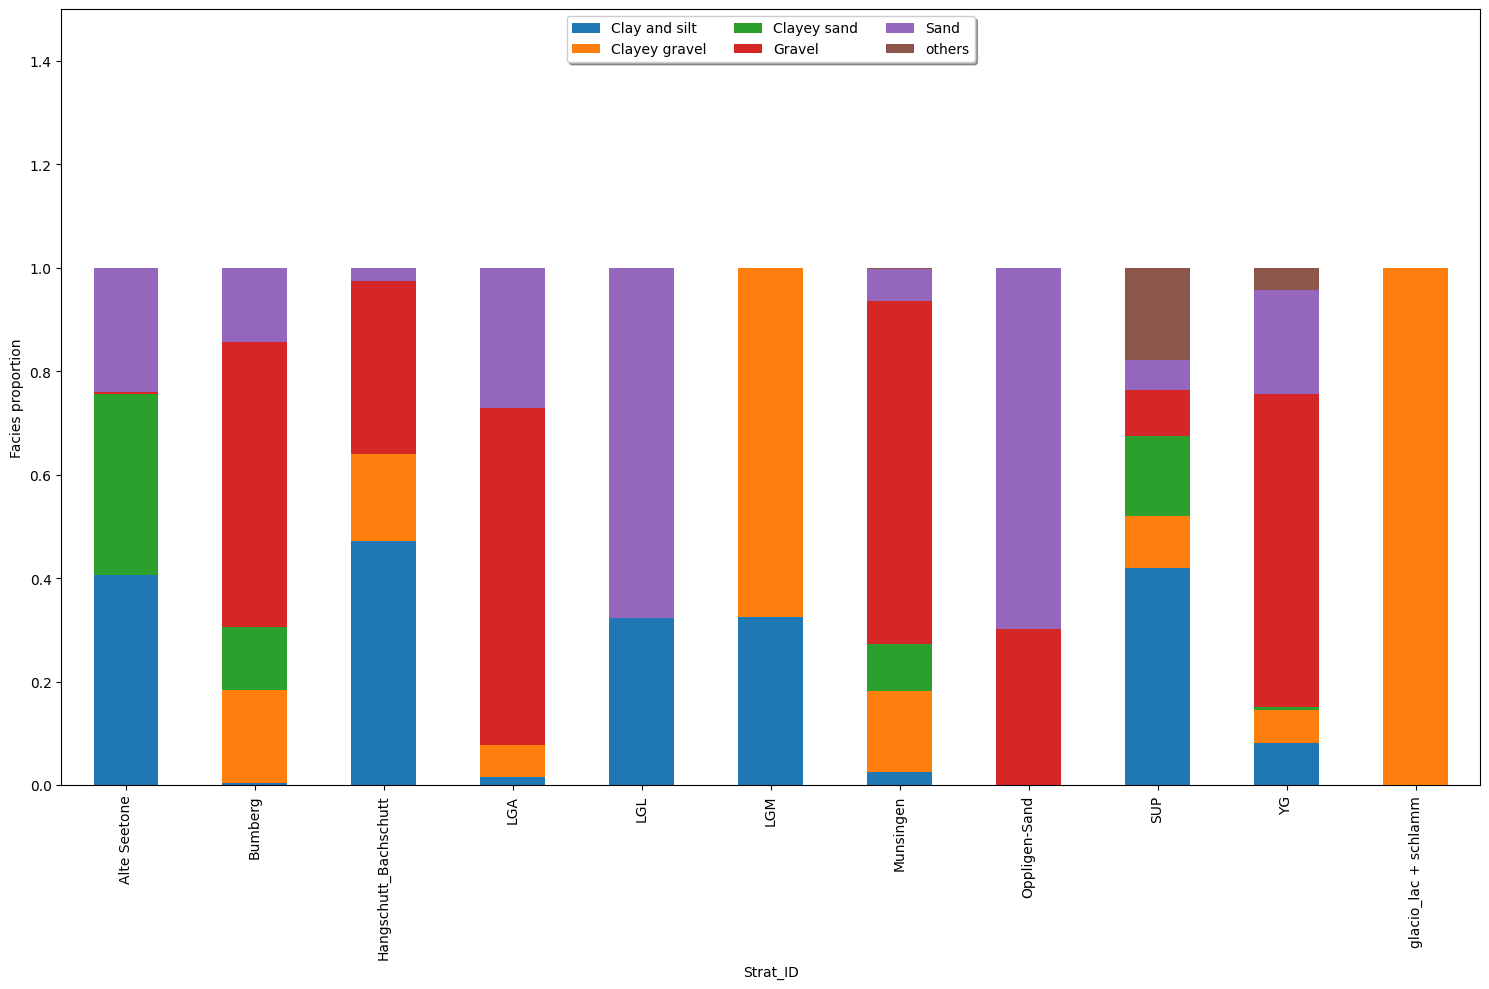

In [7]:
# Borehole analysis
ArchPy.inputs.bhs_analysis(db)

When plotting the boreholes, there is also the possibility to display the top and the bot of the domain. Simply set the corresponding flag to True as below.

In [8]:
T1.plot_bhs(v_ex=10, plot_bot=True, plot_top=True)

Widget(value="<iframe src='http://localhost:60997/index.html?ui=P_0x2c54bb50f90_0&reconnect=auto' style='width…

### Geological map

Geological map can also be directly passed as the path to the raster. Simply call the ``geol_map_path()`` method of the table.

In [9]:
geol_map_path = "data/geol_map_2.tif"

In [10]:
T1.add_geological_map(geol_map_path)

Geological map added


We can now plot this map. The colors used are the same of the one in the Table.

In [11]:
p = pv.Plotter()
T1.plot_geol_map(v_ex=10, plotter=p)
T1.plot_bhs(v_ex=10, plotter=p)
p.show()

Widget(value="<iframe src='http://localhost:60997/index.html?ui=P_0x2c54e389ed0_1&reconnect=auto' style='width…

In order to use the geological map, it is necessary to process it and to extract the information. Practically, ArchPy will create fake small boreholes at the surface with appropriate geological information taken from the geological map.

This is done automatically using the ``process_geological_map()`` method. Two types of process exist:

- uniform --> extract information uniformly. Step argument indicates the number of cells between each sampling. step=1 mean to sample in each cells of the map but the simulations will be very slow. 4-5 are relatively good values.
- boundaries --> only extract information at transition between two different units.
- all --> mix of uniform and boundaries

You can retrieve these fake boreholes in the list ``.list_map_bhs`` of the table.

In [12]:
T1.list_map_bhs=[]
T1.process_geological_map(typ="uniform", step=4)

Geological map extracted - processus ended successfully


In [13]:
len(T1.list_map_bhs)

355

In [14]:
T1.process_bhs()

##### ORDERING UNITS ##### 
Pile Pile_Aar: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
Multiples boreholes ['A1140', 'raster_bh'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['A1321', 'A264', 'raster_bh'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['A528', 'raster_bh'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['A7068', 'A7069'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['AKB_2050', 'raster_bh'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['AKB_2056', 'raster_bh'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['AKB_2075', 'raster_bh'] were found inside the same cell, the deepest will be kept
Multiples boreholes ['AKB_2112', 'raster_bh'] were found inside the same cell, the deepest will be kept
Unit YG appear more than one time in

In [15]:
T1.compute_surf(5)

########## PILE Pile_Aar ##########
Pile Pile_Aar: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT Alte Seetone
Alte Seetone: time elapsed for computing surface 0.2303791046142578 s

#### COMPUTING SURFACE OF UNIT Oppligen-Sand
Oppligen-Sand: time elapsed for computing surface 0.21642088890075684 s

#### COMPUTING SURFACE OF UNIT Bumberg
Bumberg: time elapsed for computing surface 0.26429200172424316 s

#### COMPUTING SURFACE OF UNIT glacio_lac + schlamm
glacio_lac + schlamm: time elapsed for computing surface 0.22609663009643555 s

#### COMPUTING SURFACE OF UNIT Munsingen
Munsingen: time elapsed for computing surface 0.2227954864501953 s

#### COMPUTING SURFACE OF UNIT LGM
LGM: time elapsed for computing surface 0.22041010856628418 s

#### COMPUTING SURFACE OF UNIT LGL
LGL: time elapsed for computing surface 0.17703509330749512 s

#### COMPUTING SURFACE OF UNIT LGA
LGA: time elapsed for computing surface 0.18352460861206055 s

###

C:\Users\schorppl\Anaconda3\envs\bebou\Lib\site-packages\ArchPy\base.py:3615: RuntimeWarning: invalid value encountered in cast
  idx_s2=(np.round((s2-z0)/sz)).astype(int)
C:\Users\schorppl\Anaconda3\envs\bebou\Lib\site-packages\ArchPy\base.py:3614: RuntimeWarning: invalid value encountered in cast
  idx_s1=(np.round((s1-z0)/sz)).astype(int)



Time elapsed for getting domains 0.13414692878723145 s

#### COMPUTING SURFACE OF UNIT Alte Seetone
Alte Seetone: time elapsed for computing surface 0.2149336338043213 s

#### COMPUTING SURFACE OF UNIT Oppligen-Sand
Oppligen-Sand: time elapsed for computing surface 0.2214064598083496 s

#### COMPUTING SURFACE OF UNIT Bumberg
Bumberg: time elapsed for computing surface 0.35205769538879395 s

#### COMPUTING SURFACE OF UNIT glacio_lac + schlamm
glacio_lac + schlamm: time elapsed for computing surface 0.22140836715698242 s

#### COMPUTING SURFACE OF UNIT Munsingen
Munsingen: time elapsed for computing surface 0.21941328048706055 s

#### COMPUTING SURFACE OF UNIT LGM
LGM: time elapsed for computing surface 0.21741795539855957 s

#### COMPUTING SURFACE OF UNIT LGL
LGL: time elapsed for computing surface 0.1825118064880371 s

#### COMPUTING SURFACE OF UNIT LGA
LGA: time elapsed for computing surface 0.19946670532226562 s

#### COMPUTING SURFACE OF UNIT YG
YG: time elapsed for computing surfa

In [18]:
p = pv.Plotter()

scalar_bar_kwargs= {"title_font_size":15,"label_font_size":12,"vertical":True,"shadow":True,
                    "position_x":0.25, "position_y":0.35}
T1.plot_units(2, plotter = p, v_ex=10, scalar_bar_kwargs=scalar_bar_kwargs)
scalar_bar_kwargs= {"title_font_size":15,"label_font_size":12,"vertical":True,"shadow":True,
                    "position_x":0.25, "position_y":0.35}

p.show()

Widget(value="<iframe src='http://localhost:60997/index.html?ui=P_0x2c564d82510_4&reconnect=auto' style='width…

In [19]:
## sections
p = pv.Plotter()
scalar_bar_kwargs= {"title_font_size":15,"label_font_size":12,"vertical":True,"shadow":True,
                    "position_x":0.35, "position_y":0.35}
T1.plot_units(v_ex=10, slicey=(0.1, 0.3, 0.5, 0.7, 0.9), scalar_bar_kwargs=scalar_bar_kwargs, plotter=p)
T1.plot_bhs(plotter = p, v_ex=10)

p.show()

Widget(value="<iframe src='http://localhost:60997/index.html?ui=P_0x2c564d9e650_5&reconnect=auto' style='width…

### Self-made cross-section 

With the two following cells, you can draw the cross-section that you want.

The first cell is for choosing the path of the cross-section and the second to display them.

In [18]:
gmap = T1.compute_geol_map(0, color = True)

%matplotlib tk
plt.imshow(gmap, origin="lower", extent = [T1.ox, T1.xg[-1], T1.oy, T1.yg[-1]])

lbhx = [bh.x for bh in T1.list_bhs]
lbhy = [bh.y for bh in T1.list_bhs]
plt.scatter(lbhx, lbhy, c="r", s=5)
list_p = plt.ginput(n=-1, timeout=0)
plt.close()

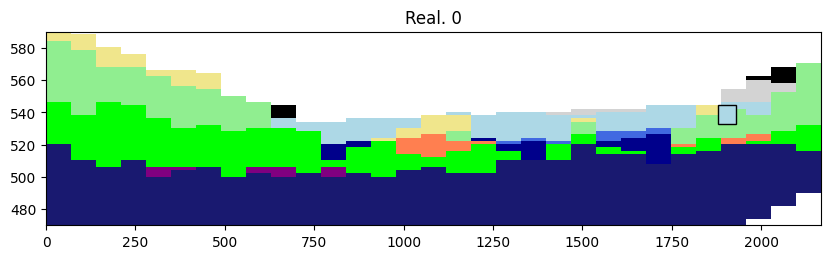

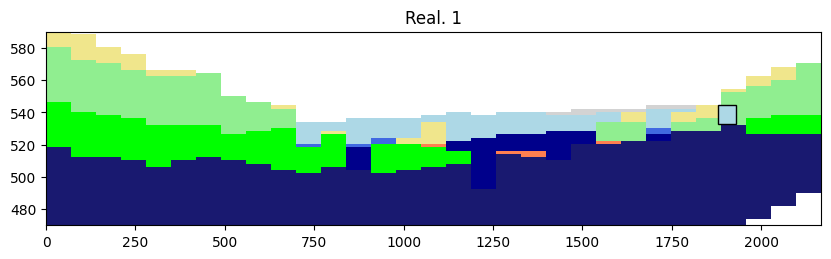

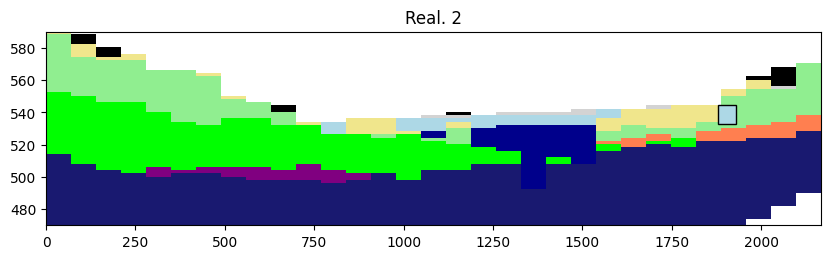

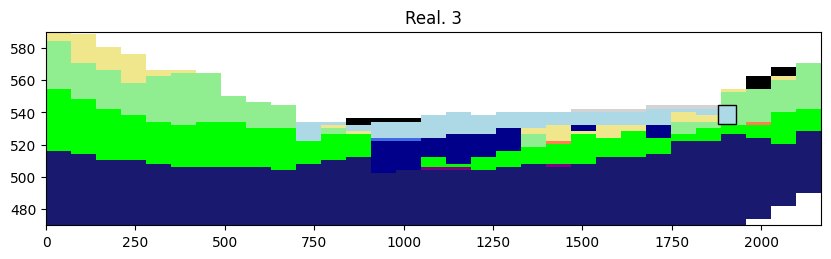

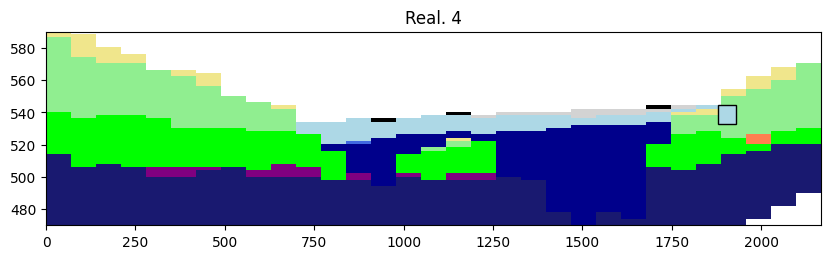

In [19]:
%matplotlib inline
for iu in range(T1.nreal_units):
    T1.plot_cross_section(list_p, iu=iu, ratio_aspect=4, width=50, dist_max=100)
    plt.title("Real. {}".format(iu))
    plt.show()

### Save and load

Saving a model with archpy is straightforward. Simply call the function ``ArchPy.inputs.save_project()``. The only argument that can be used is the flag ``results`` to save or not the results of the table. Indeed, sometimes it can be interesting to just save the table with all the parameters but not the results. SAving the results can indeed take a lot of time if the model are large.

In [20]:
ArchPy.inputs.save_project(T1)

Project saved successfully


True